# Digit Recognition

In [144]:
from keras.datasets import mnist
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd


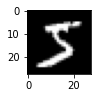

5


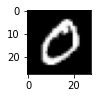

0


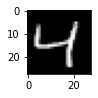

4


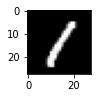

1


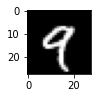

9


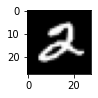

2


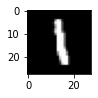

1


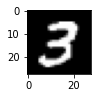

3


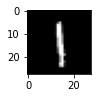

1


In [123]:
#Train et Test set avec print de quelques digit
(X_train,y_train),(X_test,y_test) = mnist.load_data()
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    print(y_train[i])

In [38]:
#Print shape
print(X_train.shape)
#60000 images de 28 pixels sur 28 pixels

(60000, 28, 28)


In [39]:
#Reshape
width, height, channels = X_train.shape[1],X_train.shape[2],1

X_train = X_train.reshape((X_train.shape[0],width, height, channels))
X_test = X_test.reshape((X_test.shape[0],width, height, channels))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#Convertion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

""" #Normalize
X_train = X_train/255.0
X_test = X_test/255.0 """

""" #Normalize, Standardize and Recenter images datas
    resampler = ImageDataGenerator(rescale=1.0/255.0,featurewise_center=True,featurewise_std_normalization=True)
    resampler.fit(K_X_train)
    #Iterators
    train_iterator = resampler.flow(K_X_train,K_Y_train, batch_size=64)
    test_iterator = resampler.flow(K_X_test,K_Y_test, batch_size=64) """



# CNN Model for digit recognition

In [84]:
def create_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3,3), kernel_initializer='he_uniform', activation='relu',kernel_regularizer=l2(l=0.01), input_shape=(width,height,channels)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(l=0.01)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(l=0.01)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer= optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics = ['accuracy'])
    return model



In [85]:
#Evalution du modèle avec Cross-Validation

kfold = KFold(5,shuffle=True,random_state=1)
scores,histories = list(),list()
for K_train, K_test in kfold.split(X_train):
    model = create_model()
    K_X_train,K_Y_train,K_X_test,K_Y_test = X_train[K_train],y_train[K_train],X_train[K_test],y_train[K_test]
    #Normalize, Standardize and Recenter images datas
    resampler = ImageDataGenerator(rescale=1.0/255.0,featurewise_center=True,featurewise_std_normalization=True)
    resampler.fit(K_X_train)
    #Iterators
    train_iterator = resampler.flow(K_X_train,K_Y_train, batch_size=64)
    test_iterator = resampler.flow(K_X_test,K_Y_test, batch_size=64)
    history = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator),epochs=5)
    misc,accuracy = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
    print(float(accuracy) * 100.0)
    scores.append(accuracy)
    histories.append(history)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\pc\AppData\Local\Temp/ipykernel_28916/874406666.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator),epochs=5)


750/750 [==============================] - 29s 38ms/step - loss: 0.1902 - accuracy: 0.9430
Epoch 2/5
750/750 [==============================] - 29s 38ms/step - loss: 0.0550 - accuracy: 0.9830
Epoch 3/5
750/750 [==============================] - 28s 38ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 4/5
750/750 [==============================] - 28s 38ms/step - loss: 0.0264 - accuracy: 0.9917
Epoch 5/5
750/750 [==============================] - 29s 39ms/step - loss: 0.0212 - accuracy: 0.9932
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Ca

C:\Users\pc\AppData\Local\Temp/ipykernel_28916/874406666.py:15: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  misc,accuracy = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)


98.81666898727417
Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
750/750 [==============================] - 28s 37ms/step - loss: 0.1950 - accuracy: 0.9407
Epoch 2/5
750/750 [==============================] - 29s 39ms/step - loss: 0.0552 - accuracy: 0.98230s - loss: 0.0553 - accura
Epoch 3/5
750/750 [==============================] - 27s 36ms/step -

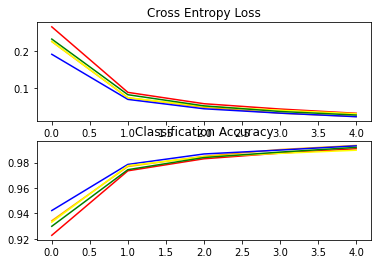

In [83]:
loss_colors = ('blue','red','yellow','green','orange')
for i in range(len(histories)):
    pyplot.subplot(2,1,1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'],color=loss_colors[i-1], label=str('K'+str(i+1)))

    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color=loss_colors[i-1], label=str('K'+str(i+1)))
pyplot.show()

In [114]:
print(scores)
print(np.mean(scores))

[0.9881666898727417, 0.9856666922569275, 0.9862499833106995, 0.9899166822433472, 0.987416684627533]
0.9874833464622498


In [ ]:
model.save("digit_recognition.h5")

# Trying with real datas

In [86]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [124]:
def load_image(filename,width,height,channels):
    image = load_img(filename,grayscale=True,target_size=(28,28))
    pyplot.subplot(2,1,2)
    pyplot.imshow(image, cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    image = img_to_array(image)
    image = image.reshape(1,width,height,channels)
    image = image.astype('float32')
    image = image/255.0
    image = image - np.mean(image)
    image = (image - np.mean(image))/np.std(image)
    return image
    

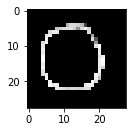

2


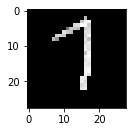

7


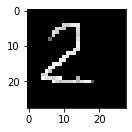

2


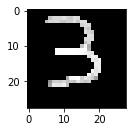

3


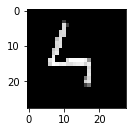

4


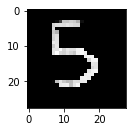

5


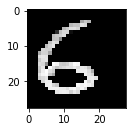

8


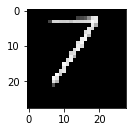

1


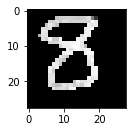

8


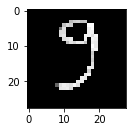

2


In [141]:
for i in range(0,10):
    image = load_image("Data/"+str(i)+"_data.png",width,height,channels)
    predict_value = model.predict(image)
    digit = np.argmax(predict_value)
    print(digit)